In [9]:
import numpy as np
import qutip
import pickle
import stages

In [10]:
lmbd_1 = .7
Nt_1 = 10**3
T_1 = 10
omega0_1 = 1
dt_1 = .02

f = open(f"data/lambda={lmbd_1}-Nt={Nt_1}T={T_1}-dt={dt_1}-omega0={omega0_1}.pkl", "rb")
states_infty_1 = pickle.load(f)
f.close()


lmbd_2 = .7
Nt_2 = 10**3
T_2 = 10
omega0_2 = 1
dt_2 = .05

f = open(f"data/lambda={lmbd_2}-Nt={Nt_2}T={T_2}-dt={dt_2}-omega0={omega0_2}.pkl", "rb")
states_infty_2 = pickle.load(f)
f.close()

In [11]:
thetas_1 = []
for state in states_infty_1:
    thetas_1.append(stages.state_to_theta(state))

thetas_2 = []
for state in states_infty_2:
    thetas_2.append(stages.state_to_theta(state))

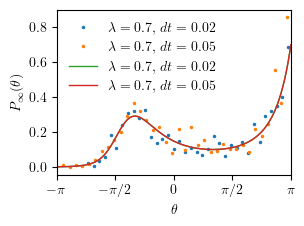

In [12]:
import matplotlib.pyplot as plt

# a = plt.hist(thetas)
plt.style.use(["./config/stylelib/thesis.mplstyle", "./config/stylelib/manuscript_fullwidth.mplstyle"])

counts_1, bins_1 = np.histogram(thetas_1, 36)
bin_width = bins_1[1] - bins_1[0]
freqs_1 = counts_1 / Nt_1 / bin_width

counts_2, bins_2 = np.histogram(thetas_2, 36)
freqs_2 = counts_2 / Nt_2 / bin_width

plt.plot(bins_1[:-1] + bin_width/2, freqs_1, ".", label=fr"$\lambda={lmbd_1}$, $dt={dt_1}$")
plt.plot(bins_2[:-1] + bin_width/2, freqs_2, ".", label=fr"$\lambda={lmbd_2}$, $dt={dt_2}$")
plt.plot(np.arange(-np.pi, np.pi, .01), stages.p_infty(lmbd_1, np.arange(-np.pi, np.pi, .01)), label=fr"$\lambda={lmbd_1}$, $dt={dt_1}$")
plt.plot(np.arange(-np.pi, np.pi, .01), stages.p_infty(lmbd_2, np.arange(-np.pi, np.pi, .01)), label=fr"$\lambda={lmbd_2}$, $dt={dt_2}$")

plt.xlim((-np.pi, np.pi))
xticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
xlabels = [r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"]
plt.xticks(xticks, xlabels)
plt.xlabel(r"$\theta$")
plt.ylabel(r"$P_\infty(\theta)$")
plt.legend()

plt.tight_layout()

plt.savefig(f"plots/multiple-dt.pdf")